In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from LIMxCMBL.init import *
from LIMxCMBL.noise import *

In [3]:
# CCAT-prime
zmin = 3.5
zmax = 8.1

Omega_field = 8 * (np.pi/180)**2 #rad^2
Pei = 2.3e4 #Mpc^3 kJy^2 /sr^2 
chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

In [4]:
Lambdas = np.logspace(-5, 0, 50)

In [5]:
from tqdm import tqdm

In [6]:
chis_resample_len = int(np.log2(len(chis_resample)))

In [15]:
chis_resample_len

10

In [7]:
def tmp_plot(field):
    vminmax = np.max(np.abs(field))
    plt.figure(figsize=(3.5,3.5), dpi=100, facecolor='w',)

    # plot data
    plt.imshow(field, 
               origin='lower',
              cmap = 'seismic',
              vmin = -vminmax,
              vmax =  vminmax,
              extent=[chimin,chimax, chimin, chimax])

    plt.colorbar()

    plt.xlabel(r'$\chi$')
    plt.ylabel(r"$\chi'$")
    plt.show()

In [27]:
ells[42]

139.64248786913063

100%|██████████| 50/50 [00:00<00:00, 2383.61it/s]


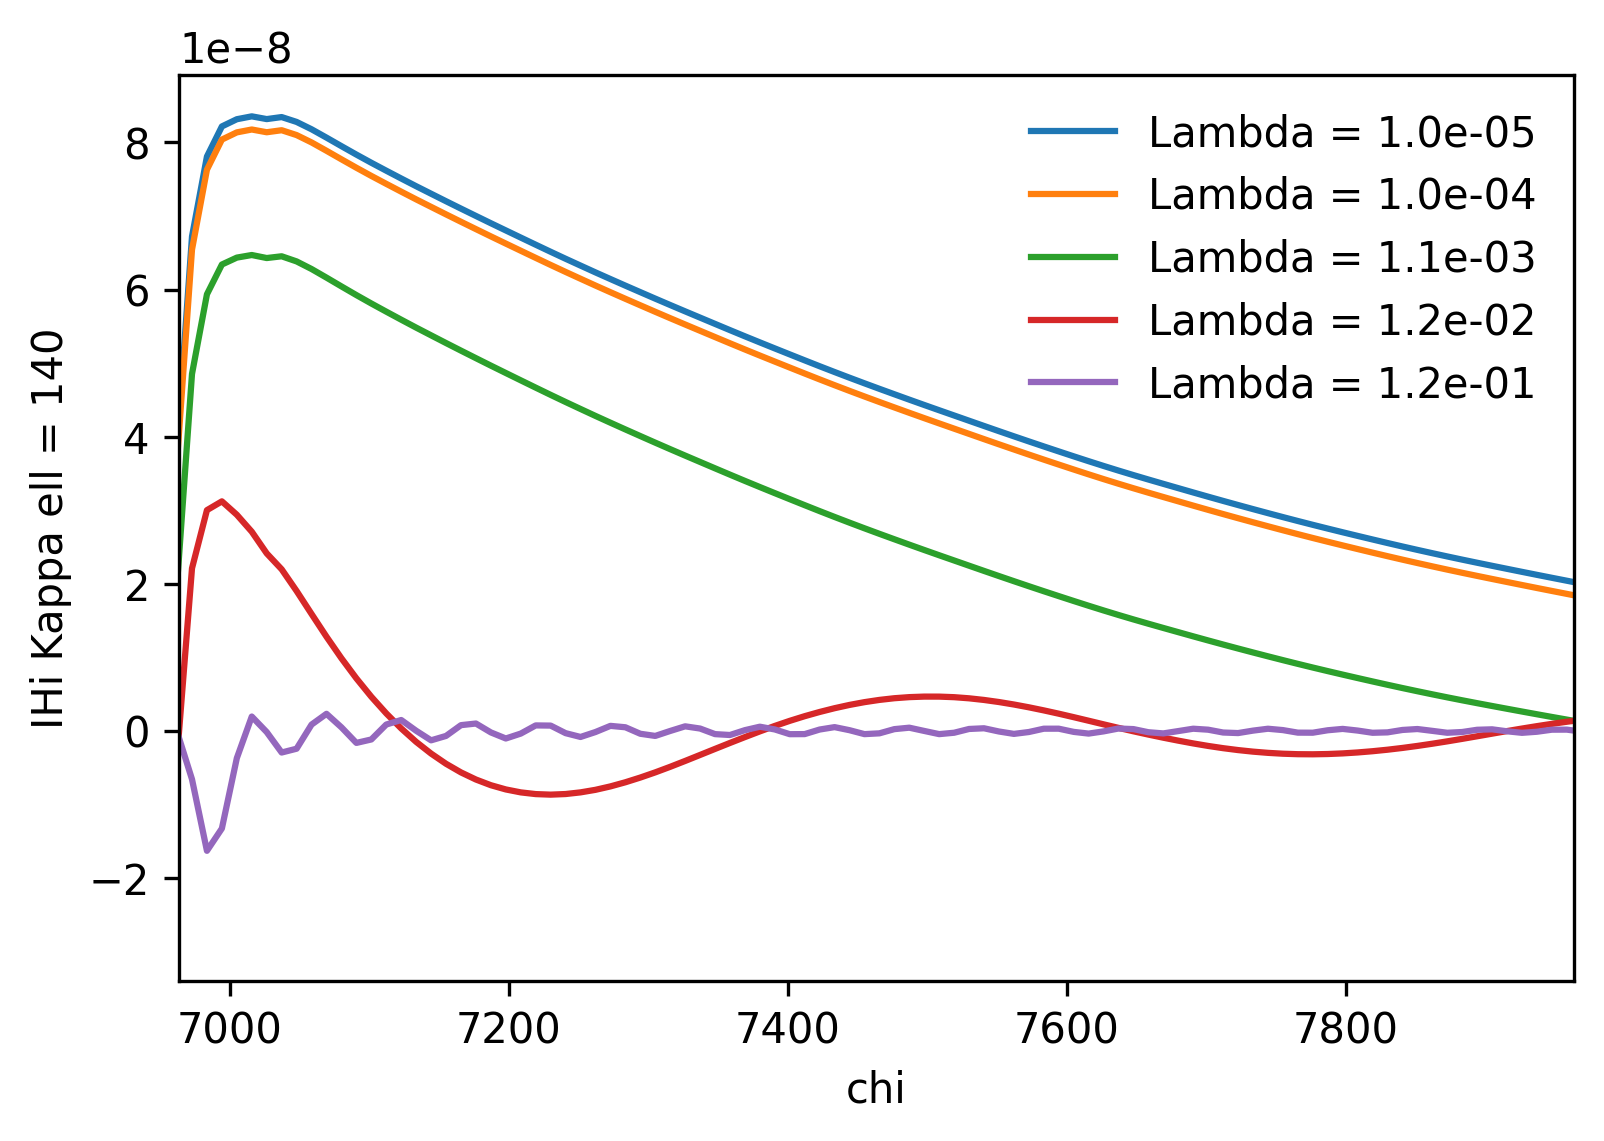

In [29]:
i = -1
plt.figure(dpi = 300, facecolor = 'w')
for Lambda in tqdm(Lambdas):
    i += 1
    if(i%10 != 0):
        continue
    IHi_kappa_fname = '/scratch/users/delon/LIMxCMBL/IHiKappa/zmin_%.5f_zmax_%.5f_Lambda_%.5f_chi_sample_2e%d.npy'%(zmin, zmax, Lambda,chis_resample_len)

    try:
        IHi_kappa = np.load(IHi_kappa_fname) #[kJy/sr Mpc]
        plt.plot(chis_resample, IHi_kappa[42], label = 'Lambda = %.1e'%(Lambda))
        plt.legend(frameon= False)
        plt.xlim(chimin, chimin + 1000)
        plt.xlabel('chi')
        plt.ylabel('IHi Kappa ell = 140')
    except:
        print('skipping', Lambda)
        continue

LAMBDA = 1.000e-05##################################


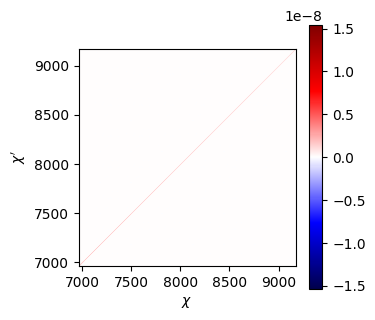

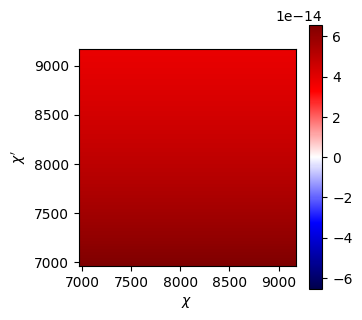

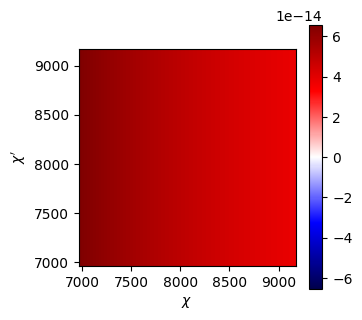

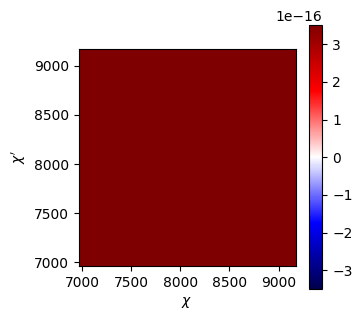

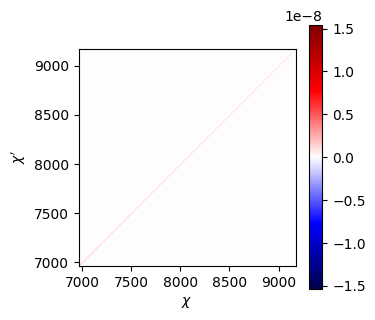

###############################################
LAMBDA = 1.048e-04##################################


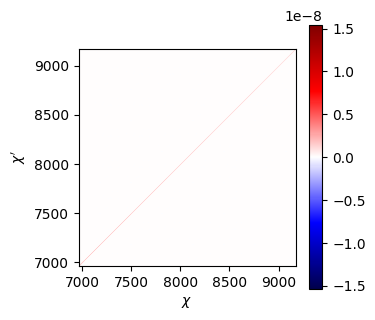

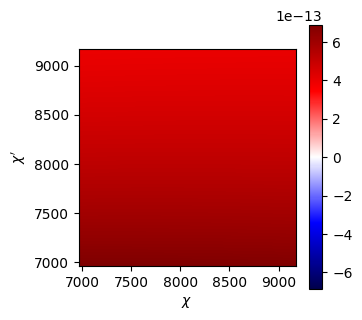

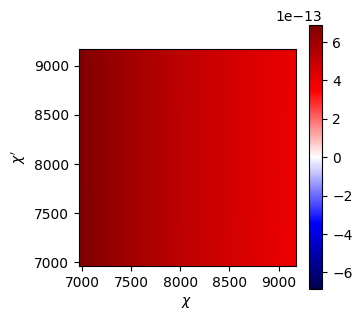

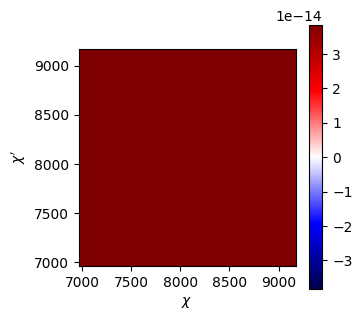

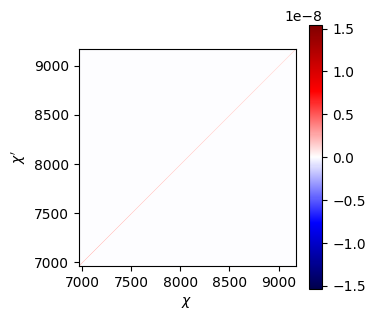

###############################################
LAMBDA = 1.099e-03##################################


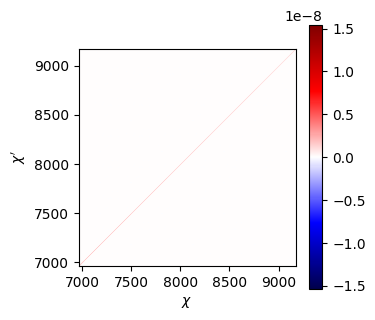

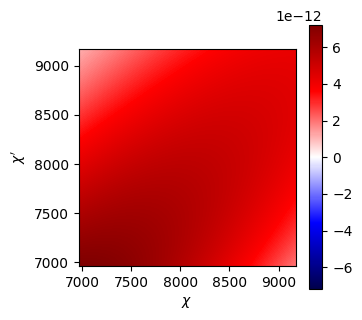

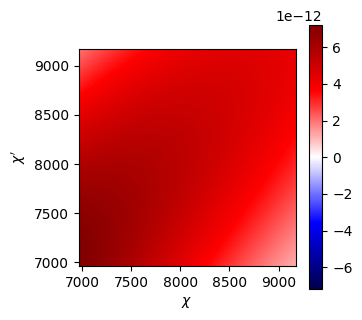

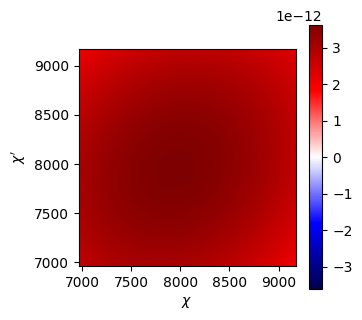

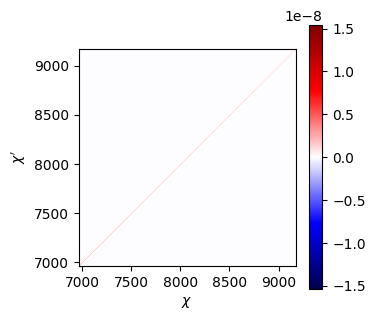

###############################################
LAMBDA = 1.151e-02##################################


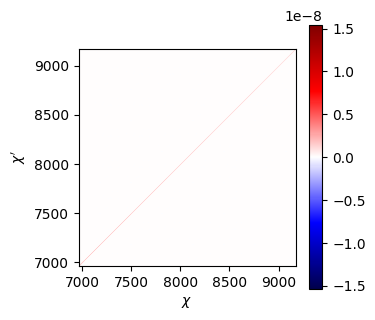

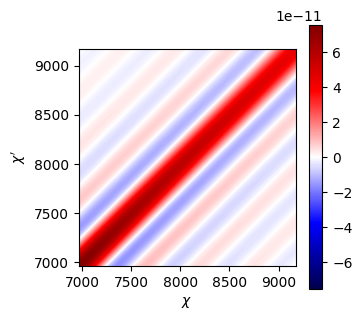

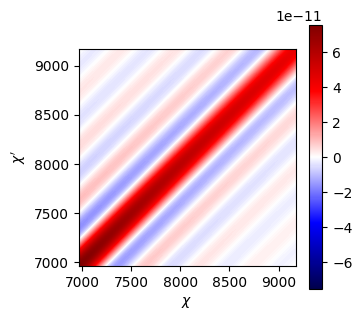

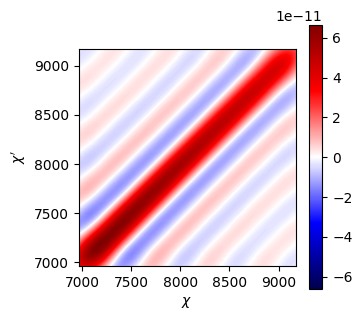

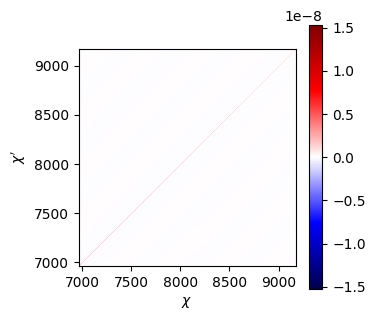

###############################################
LAMBDA = 1.207e-01##################################


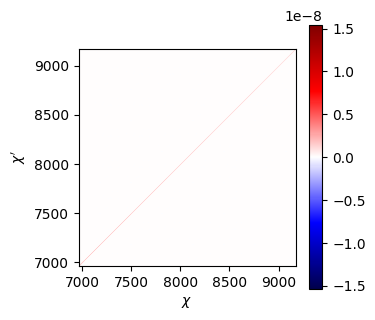

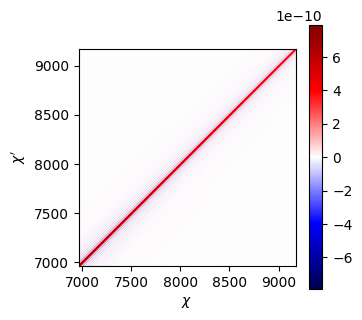

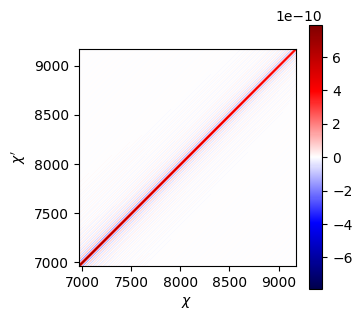

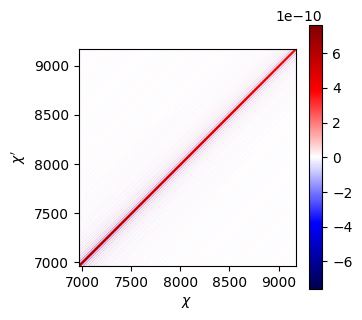

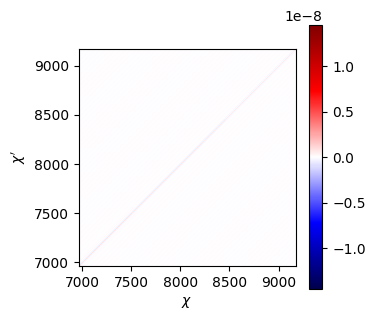

###############################################


In [31]:
i = -1
for Lambda in (Lambdas):
    
    i+= 1
    if(i%10 != 0 ):
        continue

    oup_fname = '/scratch/users/delon/LIMxCMBL/eHIeHI/zmin_%.5f_zmax_%.5f_Lambda_%.5e_chi_sample_2e%d'%(zmin, zmax, Lambda,chis_resample_len)
    oup_fname = '/scratch/users/delon/LIMxCMBL/eHIeHI/zmin_%.5f_zmax_%.5f_Lambda_%.5e_chi_sample_2e13'%(zmin, zmax, Lambda)

    eIeI   = np.load(oup_fname + 'eIeI.npy' )
    eIeLO  = np.load(oup_fname + 'eIeLO.npy')
    eLOeI  = np.load(oup_fname + 'eLOeI.npy' )
    eLOeLO = np.load(oup_fname + 'eLOeLO.npy')
    eHIeHI = eIeI + eLOeLO - eIeLO - eLOeI
    
    print('LAMBDA = %.3e##################################'%(Lambda))
    tmp_plot(eIeI)
    tmp_plot(eIeLO)
    tmp_plot(eLOeI)
    tmp_plot(eLOeLO)
    tmp_plot(eHIeHI)
    print('###############################################')

In [ ]:
zmin = 2
zmax = 5

chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

In [ ]:
window = np.where((chis_resample > chimin) & (chis_resample < chimax))[0]

In [ ]:
from  LIMxCMBL.kernels import *
f_KLIM   = get_f_KI()
f_KLIM_windowed = apply_window(f_K = f_KLIM,
                               chimin = chimin,
                               chimax = chimax)
f_KLIM_twindowed = apply_window_tanh(f_K = f_KLIM,
                               chimin = chimin,
                               chimax = chimax)

In [ ]:
f = f_KLIM(chis_resample)
f_window = f_KLIM_windowed(chis_resample)
f_window_tanh = f_KLIM_twindowed(chis_resample)

In [ ]:
plt.figure(dpi = 300)
plt.plot(chis_resample, f)
plt.plot(chis_resample, f_window)

# plt.plot(chis_resample, f_window_tanh)
# plt.plot(chis_resample[window], f_window[window], 'k--')


In [ ]:
f_k = np.fft.rfft(f)
f_window_k = np.fft.rfft(f_window)
f_window_tanh_k = np.fft.rfft(f_window_tanh)
k = 2*np.pi * np.fft.rfftfreq(n = len(f), d = np.mean(np.diff(chis_resample)))


f_window2_k = np.fft.rfft(f_window[window])
k2 = 2*np.pi * np.fft.rfftfreq(n = len(window), d = np.mean(np.diff(chis_resample)))

In [ ]:
plt.figure(dpi = 300)
plt.plot(k, np.abs(f_window_k), label='windowed')
# plt.plot(k, np.abs(f_window_tanh_k), label='tanh windowed')
# plt.plot(k2, np.abs(f_window2_k), label='window2')

plt.plot(k, np.abs(f_k), label='no window', c='k')
plt.legend(frameon = False)
plt.xscale('log')
plt.yscale('log')

In [ ]:
cut = 1e-3

In [ ]:
f_k_filtered = np.where(k < cut, 0, f_k)
f_window_k_filtered = np.where(k < cut, 0, f_window_k)
f_window_tanh_k_filtered = np.where(k < cut, 0, f_window_tanh_k)

f_window2_k_filtered = np.where(k2 < cut, 0, f_window2_k)

In [ ]:
plt.figure(dpi = 300)
plt.plot(k, np.abs(f_window_k_filtered), label='windowed')
# plt.plot(k, np.abs(f_window_tanh_k_filtered), label='tanh windowed')
plt.plot(k2, np.abs(f_window2_k_filtered), label='window2')
plt.plot(k, np.abs(f_k_filtered), label='no window', c='k')

plt.legend(frameon = False)
plt.xscale('log')
plt.yscale('log')

In [ ]:
ff = np.fft.irfft(f_k_filtered)
ff_window = np.fft.irfft(f_window_k_filtered)
ff_window_tanh = np.fft.irfft(f_window_tanh_k_filtered)

ff_window2 = np.fft.irfft(f_window2_k_filtered)

In [ ]:
plt.figure(dpi = 300)
plt.plot(chis_resample, ff)
plt.plot(chis_resample, ff_window)
# plt.plot(chis_resample, ff_window_tanh)
plt.plot(chis_resample[window][:-1], ff_window2)
plt.legend(frameon = False)